<a href="https://colab.research.google.com/github/sanathshetty444/cyber-bullying/blob/main/Cyber_bullying_with_added_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
os.chdir('/content/drive/MyDrive/CBD_dataset/')

In [3]:
os.listdir()

['train', 'valid', 'test', 'models', 'json', '.ipynb_checkpoints', 'jsmodel']

In [4]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10, shuffle=False)


Found 358 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

#CNN Model

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
36/36 - 26s - loss: 2.1673 - accuracy: 0.9022 - val_loss: 13.6174 - val_accuracy: 0.6757
Epoch 2/10
36/36 - 26s - loss: 0.7512 - accuracy: 0.9441 - val_loss: 11.0524 - val_accuracy: 0.7027
Epoch 3/10
36/36 - 26s - loss: 0.2588 - accuracy: 0.9749 - val_loss: 8.4304 - val_accuracy: 0.7027
Epoch 4/10
36/36 - 26s - loss: 0.0197 - accuracy: 0.9972 - val_loss: 8.9531 - val_accuracy: 0.6216
Epoch 5/10
36/36 - 26s - loss: 6.0172e-04 - accuracy: 1.0000 - val_loss: 7.0011 - val_accuracy: 0.6892
Epoch 6/10
36/36 - 26s - loss: 6.8241e-05 - accuracy: 1.0000 - val_loss: 7.0394 - val_accuracy: 0.6892
Epoch 7/10
36/36 - 26s - loss: 2.3386e-06 - accuracy: 1.0000 - val_loss: 7.0498 - val_accuracy: 0.6892
Epoch 8/10
36/36 - 26s - loss: 1.9487e-06 - accuracy: 1.0000 - val_loss: 7.0540 - val_accuracy: 0.6892
Epoch 9/10
36/36 - 26s - loss: 1.7473e-06 - accuracy: 1.0000 - val_loss: 7.0603 - val_accuracy: 0.6892
Epoch 10/10
36/36 - 26s - loss: 1.5260e-06 - accuracy: 1.0000 - val_loss: 7.0648 - val_

In [ ]:
images,label=next(test_batches)
images,label=next(test_batches)
images

array([[[[-2.5939003e+01, -5.1778999e+01, -3.2680000e+01],
         [-2.6939003e+01, -5.2778999e+01, -3.3680000e+01],
         [-2.3939003e+01, -4.9778999e+01, -3.0680000e+01],
         ...,
         [-3.0939003e+01, -5.4778999e+01, -4.1680000e+01],
         [-2.9939003e+01, -5.3778999e+01, -4.0680000e+01],
         [-2.9939003e+01, -5.3778999e+01, -4.0680000e+01]],

        [[-2.6939003e+01, -5.2778999e+01, -3.3680000e+01],
         [-2.3939003e+01, -4.9778999e+01, -3.0680000e+01],
         [-2.5939003e+01, -5.1778999e+01, -3.2680000e+01],
         ...,
         [-2.7939003e+01, -5.2778999e+01, -3.7680000e+01],
         [-2.9939003e+01, -5.4778999e+01, -3.9680000e+01],
         [-3.0939003e+01, -5.5778999e+01, -4.0680000e+01]],

        [[-2.4939003e+01, -5.0778999e+01, -3.1680000e+01],
         [-2.5939003e+01, -5.1778999e+01, -3.2680000e+01],
         [-2.3939003e+01, -4.9778999e+01, -3.0680000e+01],
         ...,
         [-2.9939003e+01, -5.4778999e+01, -3.9680000e+01],
         [

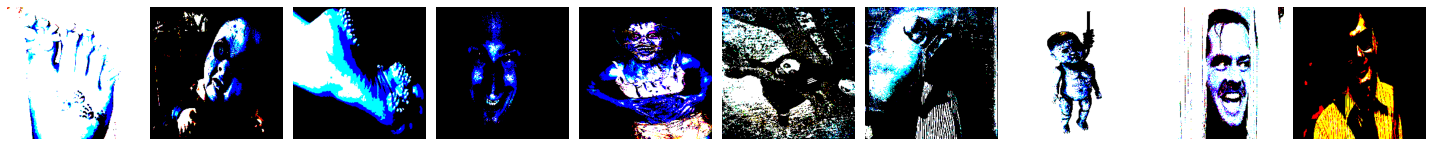

In [ ]:
plotImages(images)

In [ ]:
predictions=model.predict(x=test_batches,verbose=1)

8/8 [==============================] - 33s 5s/step


In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))


In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 9  3]
 [19 45]]


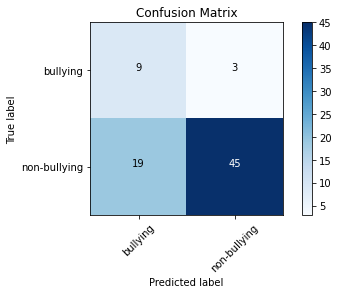

In [ ]:
cm_plot_labels = ['bullying','non-bullying']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [6]:
vgg16_model=tf.keras.applications.vgg16.VGG16()
# converting vgg16 functional model to sequential model
model=Sequential()
for layer in vgg16_model.layers[:-1]: #removing last layer since we want only two output whereas vgg16 gives 1000
  model.add(layer)
# freezing the trainable parameters so as to avoid retraining
for layer in model.layers:
  layer.trainable=False
model.add(Dense(units=2,activation="softmax"))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


553467904/553467096 [==============================] - 4s 0us/step


In [7]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
36/36 - 242s - loss: 0.6449 - accuracy: 0.7235 - val_loss: 0.5445 - val_accuracy: 0.8108
Epoch 2/10
36/36 - 182s - loss: 0.4349 - accuracy: 0.8017 - val_loss: 0.4272 - val_accuracy: 0.8243
Epoch 3/10
36/36 - 184s - loss: 0.3167 - accuracy: 0.8659 - val_loss: 0.3914 - val_accuracy: 0.8378
Epoch 4/10
36/36 - 181s - loss: 0.2526 - accuracy: 0.9022 - val_loss: 0.3638 - val_accuracy: 0.8378
Epoch 5/10
36/36 - 182s - loss: 0.2122 - accuracy: 0.9246 - val_loss: 0.3476 - val_accuracy: 0.8378
Epoch 6/10
36/36 - 185s - loss: 0.1822 - accuracy: 0.9497 - val_loss: 0.3354 - val_accuracy: 0.8649
Epoch 7/10
36/36 - 181s - loss: 0.1571 - accuracy: 0.9469 - val_loss: 0.3196 - val_accuracy: 0.8514
Epoch 8/10
36/36 - 181s - loss: 0.1370 - accuracy: 0.9637 - val_loss: 0.3160 - val_accuracy: 0.8649
Epoch 9/10
36/36 - 180s - loss: 0.1205 - accuracy: 0.9693 - val_loss: 0.3082 - val_accuracy: 0.8649
Epoch 10/10
36/36 - 178s - loss: 0.1074 - accuracy: 0.9693 - val_loss: 0.3034 - val_accuracy: 0.8649

In [8]:
predictions=model.predict(x=test_batches,verbose=1)

8/8 [==============================] - 46s 6s/step


Confusion matrix, without normalization
[[11  1]
 [14 50]]


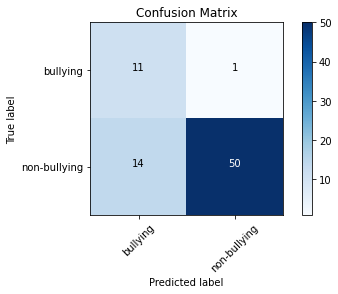

In [11]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['bullying','non-bullying']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [12]:
model.save('/content/drive/MyDrive/CBD_dataset/vgg16')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CBD_dataset/vgg16/assets


In [13]:
mobile=tf.keras.applications.mobilenet.MobileNet()
train_batches_mobile = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10)

valid_batches_mobile = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10)

test_batches_mobile = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['bull', 'non-bull'], batch_size=10,shuffle=False)
x=mobile.layers[-6].output
#preserving the functional model; it contains all layers uptil the layer sixth from bottom and a Dense output layer
output=Dense(units=2,activation="softmax")(x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches_mobile,
    steps_per_epoch=len(train_batches_mobile),
    validation_data=valid_batches_mobile,
    validation_steps=len(valid_batches_mobile),
    epochs=30,
    verbose=2
)

17227776/17225924 [==============================] - 0s 0us/step
Found 358 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
Epoch 1/30
36/36 - 180s - loss: 0.6271 - accuracy: 0.6648 - val_loss: 0.6354 - val_accuracy: 0.6622
Epoch 2/30
36/36 - 181s - loss: 0.5482 - accuracy: 0.7737 - val_loss: 0.5865 - val_accuracy: 0.6757
Epoch 3/30
36/36 - 181s - loss: 0.5263 - accuracy: 0.7765 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 4/30
36/36 - 181s - loss: 0.4964 - accuracy: 0.7793 - val_loss: 0.5538 - val_accuracy: 0.6622
Epoch 5/30
36/36 - 179s - loss: 0.4840 - accuracy: 0.8073 - val_loss: 0.6456 - val_accuracy: 0.5405
Epoch 6/30
36/36 - 181s - loss: 0.4728 - accuracy: 0.7933 - val_loss: 0.5748 - val_accuracy: 0.5946
Epoch 7/30
36/36 - 182s - loss: 0.4554 - accuracy: 0.8101 - val_loss: 0.5502 - val_accuracy: 0.6351
Epoch 8/30
36/36 - 180s - loss: 0.4407 - accuracy: 0.8324 - val_loss: 0.5641 - val_accuracy: 0.6216
Epoch 9/30
36/

In [14]:
model.save('/content/drive/MyDrive/CBD_dataset/mobile-net-model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CBD_dataset/mobile-net-model/assets


In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [16]:
predictions=model.predict(x=test_batches,verbose=1)

8/8 [==============================] - 34s 4s/step


Confusion matrix, without normalization
[[10  2]
 [26 38]]


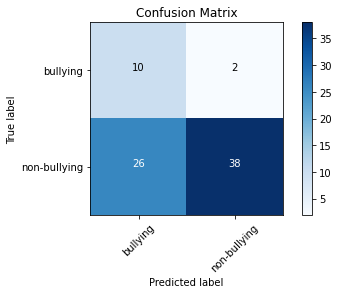

In [17]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['bullying','non-bullying']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')